In [175]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [176]:
# Input (temp, rainfall, humidity)
inputs = np.array(
    [[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58],
     [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]],
    dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

In [177]:
mu = np.mean(inputs, 0)
sigma = np.std(inputs, 0)
inputs = (inputs-mu)/sigma

In [178]:
# Weights and biases
W = np.random.rand(2, 3)
B = np.random.rand(2)

In [179]:
# Define the model
def model(x,w=W, b=B):
    return x @ w.T + b

In [180]:
preds = model(inputs)
preds

array([[-0.90030613, -1.27754702],
       [ 1.28785068,  1.4268223 ],
       [ 0.85510323,  1.84080583],
       [-0.44001579, -0.41081829],
       [ 1.01357519,  0.63135459],
       [-0.90030613, -1.27754702],
       [ 1.28785068,  1.4268223 ],
       [ 0.85510323,  1.84080583],
       [-0.44001579, -0.41081829],
       [ 1.01357519,  0.63135459],
       [-0.90030613, -1.27754702],
       [ 1.28785068,  1.4268223 ],
       [ 0.85510323,  1.84080583],
       [-0.44001579, -0.41081829],
       [ 1.01357519,  0.63135459]])

In [181]:
loss = mean_squared_error(preds, targets)
loss

8206.34195582052

In [182]:
def gradient_descent(X, Y, W, B, learning_rate, n_iters):
    JTheta = np.zeros((n_iters, 1))
    for i in range(n_iters):
        h = model(X, W, B)
        diff = h - Y
        delta = (learning_rate / Y.size) * (X.T @ diff)
        W = W - delta.T
        delta = (learning_rate / Y.size) * (np.ones([1, 15]) @ diff)
        B = B - delta
        JTheta[i] = mean_squared_error(h, Y)
    return JTheta, W, B

In [183]:
JTheta, W, B = gradient_descent(inputs, targets, W, B, 0.01, 500)
print(W)
print(B)

[[-4.77124569 21.33985229 12.53253742]
 [-3.95992745 20.87778216 13.95630343]]
[[70.01385456 84.53145391]]


In [184]:
preds = model(inputs, W, B)
preds

array([[ 50.03229295,  62.76727277],
       [ 78.71337194,  94.73197543],
       [106.58323544, 120.94985443],
       [ 15.68937758,  30.05681732],
       [ 99.05099471, 114.15134788],
       [ 50.03229295,  62.76727277],
       [ 78.71337194,  94.73197543],
       [106.58323544, 120.94985443],
       [ 15.68937758,  30.05681732],
       [ 99.05099471, 114.15134788],
       [ 50.03229295,  62.76727277],
       [ 78.71337194,  94.73197543],
       [106.58323544, 120.94985443],
       [ 15.68937758,  30.05681732],
       [ 99.05099471, 114.15134788]])

In [185]:
loss = mean_squared_error(preds, targets)
loss

55.896053191412676

In [186]:
def plot_loss(JTheta):
  plt.plot(JTheta, label='loss')
  plt.ylim([min(JTheta), max(JTheta)])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MSE]')
  plt.legend()
  plt.grid(True)

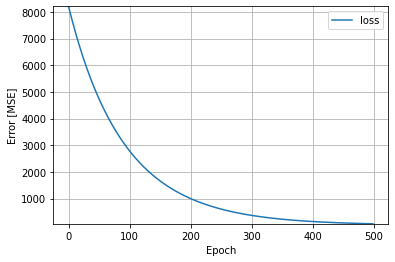

In [187]:
plot_loss(JTheta)